In [64]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x  

In [66]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [7]:
# Bogosort

In [67]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x    

In [68]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [69]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [70]:
x.sort()
print(x)

[1 2 3 4 5]


In [71]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


A related function is argsort, which instead returns the indices of the sorted

In [72]:
x[i]

array([1, 2, 3, 4, 5])

In [73]:
# # Sorting along rowsor coloumns

In [74]:
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [75]:
# sort each column of x
np.sort(x, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [76]:
# sort each row of x
np.sort(x, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [77]:
# partial sorts, Partitioning

In [78]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [79]:
# we can partiition along an arbitrary

In [80]:
np.partition(x, 2, axis=0)

array([1, 2, 3, 7, 6, 5, 4])

In [81]:
rand = np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [82]:
np.partition(x, 2,  axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [83]:
# Example k_Nearest Neighbors

In [84]:
x = rand.rand(10, 2)

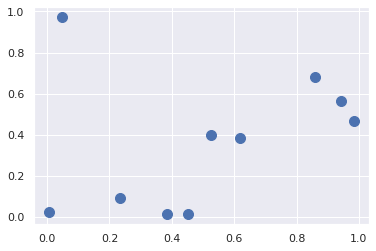

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #plot styling
plt.scatter(x[:, 0], x[:, 1], s=100);

In [86]:
#We can compute the matrix of square distance in a single line 

In [87]:
dist_sq = np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :]) ** 2, axis=-1)

In [88]:
# for each pair of points, compute diffences in their coordinates
differences = x[:, np.newaxis, :] - x[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [89]:
# square the coordinate differences 
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [90]:
# sumthe coordinate differences to  ge the squared distances
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [91]:
# corodinate differences to get the square distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [92]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [93]:
# The left most coloumns will then give the indices of the nearest neighbours:


In [94]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [95]:
# we can do the np.argpartition function

In [96]:
k = 2
nearest_partititon = np.argpartition(dist_sq, k + 1, axis=1)

In order visualize this network of neighbors, let's quickly plot the points along with lines represending the connection from each point to its two nearest neighbors:

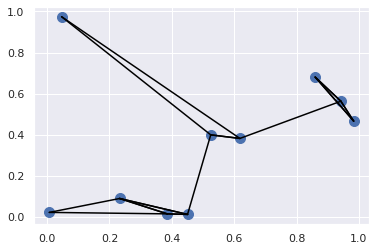

In [98]:
plt.scatter(x[:, 0], x[:, 1], s=100)
#draw lines from each points to its two nearest neighbors
k = 2

for i in range(x.shape[0]):
    for j in nearest_partititon[i, :k+1]:
        # plot a line from x[i] to x[j]
        # use some zip magic to make it happen;
        plt.plot(*zip(x[j], x[i]), color='black')